# Notebook for making a exploratory data analysis 
    - 1ª Create descriptive statistics
    - 2ª Create business hypothesis
    - 3ª Testing business hypothesis

## Business problem:

The following statement is a fictitious problem:

Telco SA is a telecommunications company located in Canada, which lately has been trying problems, they **don't know what they know is with the company's measurements**, **we don't know how to take advantage and retain customers** or even identify the **customers' consumption patterns**. Your **current costs with ways of trying to retain customers are BRL 200,000.00**

**Key problem points to attack:**

**Problems with customers (Chur)**
- **Does not know the measures of the company**
- **We don't know how to leverage and retain customers**
- **Your current costs with customer campaigns of BRL 200.000.00**

**I will seek the solution of the problems described above in addition to trying to reduce these costs of Telco SA with Data Science techniques.**

**What is a company's churn?**

The **churn** is the percentage of customers who request the cancellation of the contracted service within a certain time interval.

**How ​​to calculate your business churn rate?**

The simplest formula to measure it is to divide the number of lost customers in a month by the number that there was no start of the month, and multiply by 100.

For example: we have 500 contacts, at the end of the month we identify 30 casualties, the churn rate will be 6%.

 - Dictionary of data
    - doc\Dictionary of Telco data.xlsx

# Libs

In [1]:
# open source librares
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

import klib
import phik
import sys

In [2]:
# configs
pd.set_option('display.max.columns', 50)

In [3]:
# my functions
# config path scripts
sys.path.insert(0, 'C:/Users/erico/OneDrive/Documentos/Projeto-Eric-Churn/Telco-Customer-Churn/scripts')

from extract_data import read_data
from cramer_v_analysis import cramers_V

# Get data

In [4]:
# get dataset by Telco SA customer churn

# path to read specific csv data
path = r'C:\Users\erico\OneDrive\Documentos\Projeto-Eric-Churn\Telco-Customer-Churn\data\WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = read_data(path)

df2 = df.copy()

In [5]:
# Print first rows of dataframe
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data overview

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# check duplicateds
df2.duplicated().sum()

0

In [8]:
# check null fields
df2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 - So what for data sanity check ?
    - data not null
    - data not duplicated

# 1ª - Descriptive analysis
    - Make a statistic report from dataset

In [40]:
def make_stats_df(df:pd.DataFrame)-> pd.DataFrame:

    """ Function creates statistical report of an entire dataframe
        Receive:
            df - pandas dataframe with float or int type columns
        Returns:
            pandas dataframe and save Excel report in a data path
    """
    # filtra tipo de dados para int ou float antes da operação 
    df = df.select_dtypes(exclude=['object','datetime64'])

    # tendência central
    mean_ = pd.DataFrame(df.apply(np.mean)).T
    median_ = pd.DataFrame(df.apply(np.median)).T

    # dispersão e posição
    std_ = pd.DataFrame(df.apply( np.std ) ).T
    min_ = pd.DataFrame(df.apply( np.min )).T
    max_ = pd.DataFrame(df.apply( np.max )).T
    range_ = pd.DataFrame(df.apply(lambda x: x.max() - x.min() ) ).T
    skew_ = pd.DataFrame(df.apply(lambda x: x.skew() )).T
    kurtosis_ = pd.DataFrame(df.apply(lambda x: x.kurtosis() )).T          

    # concatenate     
    stats_df = pd.concat([min_, max_, range_, mean_, median_, std_, skew_, kurtosis_]).T.reset_index()
    stats_df.columns = ['Features','Min','Max','Range','Mean','Median','Std','Skew','Kurtosis']

    return stats_df, print('Report save in data path reports/ !')

 - Get general report statistics for numeric variables

In [10]:
# generate report statistic with function
df_number_report = make_stats_df(df2)

Report save in data path reports/ !


In [11]:
# Access dataframe report
df_number_report[0]

,Features,Min,Max,Range,Mean,Median,Std,Skew,Kurtosis
0,SeniorCitizen,0.00,1.00,1.0,0.162147,0.00,0.368585,1.833633,1.362596
1,tenure,0.00,72.00,72.0,32.371149,29.00,24.557737,0.239540,-1.387372
2,MonthlyCharges,18.25,118.75,100.5,64.761692,70.35,30.087911,-0.220524,-1.257260
3,TotalCharges,0.00,8684.80,8684.8,2279.734304,1394.55,2266.633539,0.963235,-0.228580


 - So what dataframe number report:
    - not insigths know but on MonthlyCharges the range is $100.05 !

 - Get general statistics for categorics variables

In [12]:
# select categorical data
df_categorical_report = df2.describe(exclude=['number']).T

In [13]:
# generate a new column with percent of variables frequence
df_categorical_report['pct'] = df_categorical_report['freq'] / df_categorical_report['count'] * 100

In [14]:
df_categorical_report

,count,unique,top,freq,pct
customerID,7043,7043,7590-VHVEG,1,0.014198
gender,7043,2,Male,3555,50.47565
Partner,7043,2,No,3641,51.69672
Dependents,7043,2,No,4933,70.041176
PhoneService,7043,2,Yes,6361,90.316626
MultipleLines,7043,3,No,3390,48.132898
InternetService,7043,3,Fiber optic,3096,43.95854
OnlineSecurity,7043,3,No,3498,49.666335
OnlineBackup,7043,3,No,3088,43.844952
DeviceProtection,7043,3,No,3095,43.944342


In [15]:
# store Excel with categorical report
#df_categorical_report.to_excel(r'C:\Users\erico\OneDrive\Documentos\Projeto-Eric-Churn\Telco-Customer-Churn\reports\Statistic_report_from_categorical_variables.xlsx', index=True)

 - So what categorical report 
    - Male predomine in 50.47% in the dataset Female 49,53% is balanced gender
    - Just over half of the base (51.69%) is not married
    - 70.04% of the base has no dependent
    - 90.31% of the base has telephone services
    - Less than half of the base has multiple phone lines (48.13%)
    - 43.95% Of the internet services are fiber optics
    - 49.66% of the customer don't have a OnlineSecurity
    - 43.84 of the customer don't have a OnlineBackup
    - 43.94% of the customer don't have a DeviceProtection
    - 49.31% of the customer don't have a TechSupport
    - 39.89% of the customer don't have a StreamingTV
    - 39.54% of the customer don't have a StreamingMovies
    - 55.01% the contract is Month-to-month
    - 59.22% of the payments is PaperlessBilling
    - 33.57% of the PaymentMethod is Electronic chec
    - 73.46% of the customer not is Churn

# Multivariate analysis

 - Pearson correlation in numeric variables
 - Phik correlation
 - Cramer V correlation [reference](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

### - Pearson correlation

<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

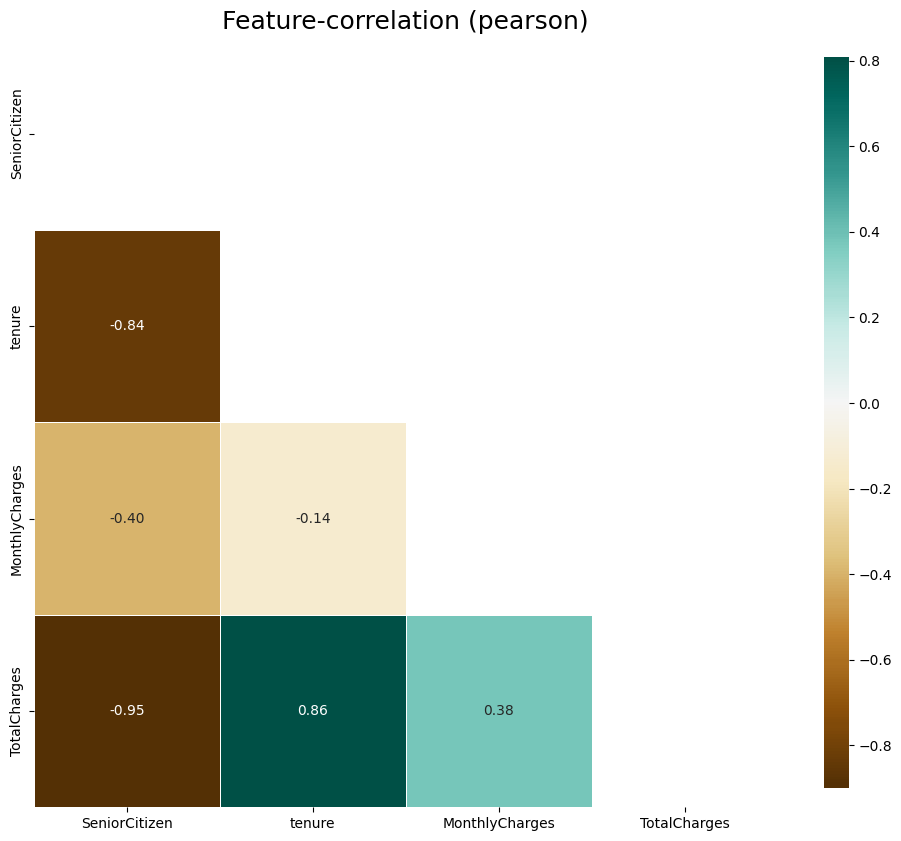

In [16]:
# correlation plot with numeric variables
df_corr = df2.select_dtypes(exclude='object')
df_corr = df_corr.corr(method='pearson')
klib.corr_plot(df_corr)

    - TotalCharges is correlated with tenure, the number of tenure impact in total cust
    - MonthlyCharges is correlated with TotalCharges, both motive the tenure
    - SeniorCitizen not have positive correlation with other variables

### - Phik correlation in all variables (mixed correlation with no linear dependence)

In [17]:
# The combined features of Phi_K form an advantage over existing coefficients. 
# First, it works consistently between categorical, ordinal and interval variables. Second, it captures non-linear dependency.
#  Third, it reverts to the Pearson correlation coefficient in case of a bi-variate normal input distribution. 
# These are useful features when studying the correlation matrix of variables with mixed types.

# mixed correlation
df2_corr_phik = df2.phik_matrix()

interval columns not set, guessing: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


c:\Users\erico\OneDrive\Documentos\Projeto-Eric-Churn\Telco-Customer-Churn\env\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable customerID is large: 7043. Are you sure this is not an interval variable? Analysis for pairs of variables including customerID can be slow.
  warnings.warn(


C:\Users\erico\AppData\Local\Temp\ipykernel_22092\1031035709.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  triangle_mask = np.zeros_like(df2_corr_phik, dtype=np.bool)


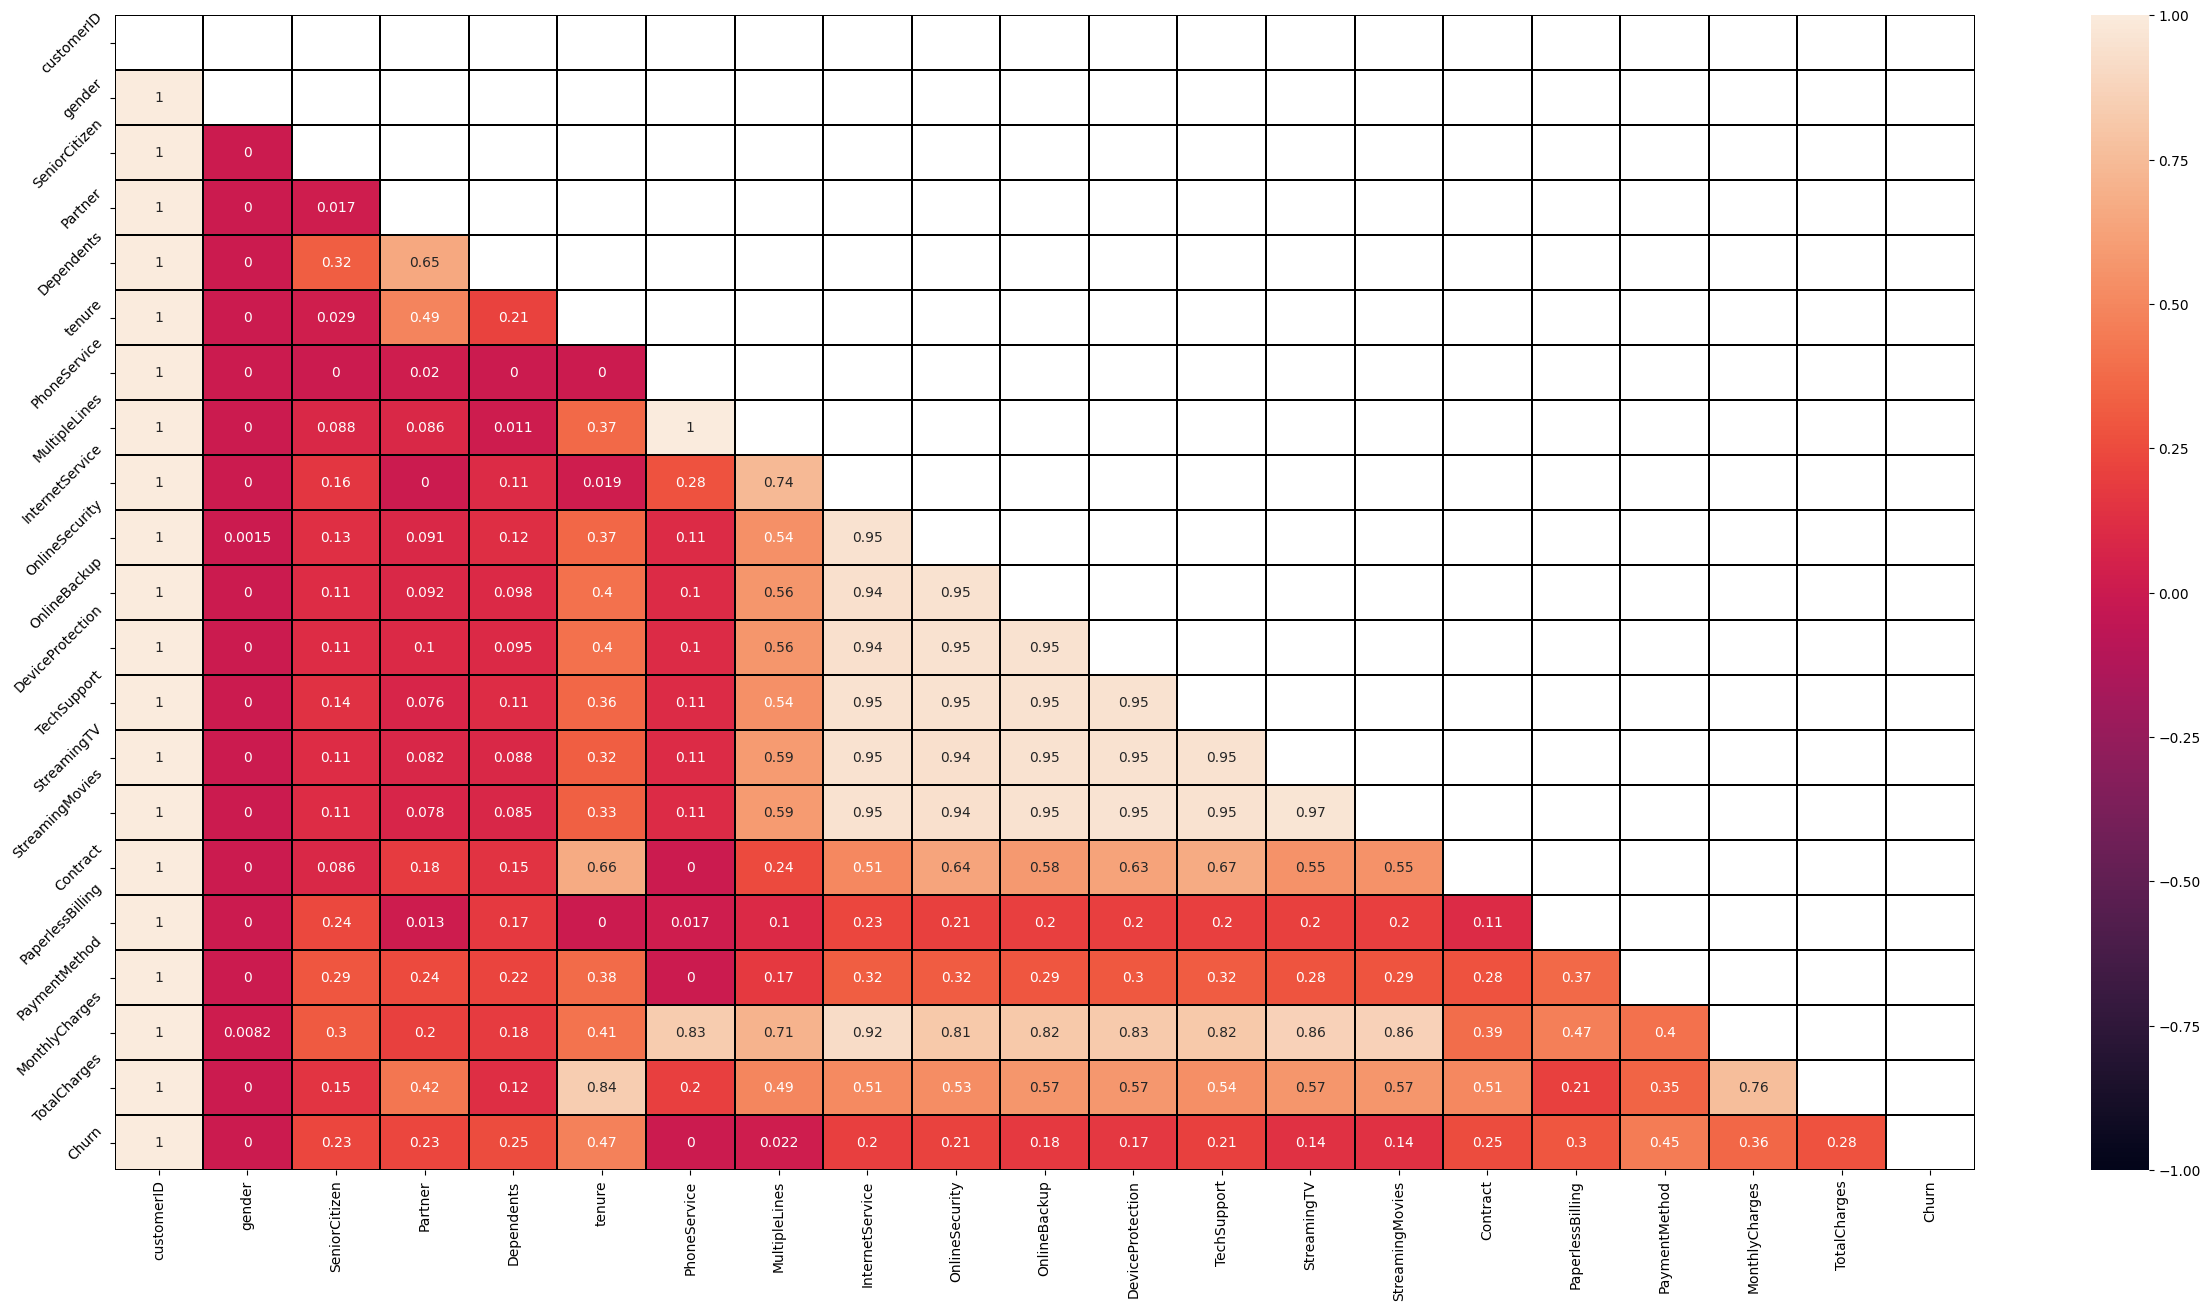

In [18]:
# visualization correlation

triangle_mask = np.zeros_like(df2_corr_phik, dtype=np.bool)
triangle_mask[np.triu_indices_from(triangle_mask)] = True
plt.figure(figsize = (30,15))
sns.heatmap(data = df2_corr_phik, linewidths=.1, linecolor='black', vmin = -1, vmax = 1, mask = triangle_mask, annot = True)
plt.yticks(rotation=45);

    - So what: List of variables contains positive correlation with target (Churn) variable

        - tenure
        - paymentmetody
        - monthlyCharges
        - paperlessbilling
        - TotalCharges
        - contract
        - Dependents
        - partner
        - SeniorCitizen
        - OnlineSecurity
        - TechSupport
        - InternetService
        - OnlineBackup
        - DeviceProtection
        - StreamingTV
        - StreamingMovies

- The problem is a multicolinearity between variables, atention in the modeling problem machine learning

### - Cramer V analysis
- Is a measure of association between two **nominal variables**, giving a value between 0 and +1 (inclusive). It is based on Pearson's chi-squared statistic

In [19]:
# select nominal variables and drop customerID for CRAMER V analysis
df_cramer = df2.select_dtypes(exclude=['int','float']).drop(['customerID'], axis=1)

In [20]:
# transform nominal/ordinal/categorical variables in Encoder labels for continue analysis

label = LabelEncoder()
df_cramer_encoded = pd.DataFrame() 

for i in df_cramer.columns :
  df_cramer_encoded[i] = label.fit_transform(df_cramer[i])

In [21]:
df_cramer_encoded.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [22]:
# bulding the cramer v matrix relation
rows = []

for var1 in df_cramer_encoded:
  col = []
  
  for var2 in df_cramer_encoded:

    cramers = cramers_V(df_cramer_encoded[var1], df_cramer_encoded[var2]) # Cramer's V test

    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  

  rows.append(col)
  
cramers_results = np.array(rows)

df_cramer_results = pd.DataFrame(cramers_results, columns = df_cramer_encoded.columns, index = df_cramer_encoded.columns)

In [23]:
df_cramer_results

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
gender,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Partner,0.0,1.00,0.20,0.00,0.02,0.00,0.02,0.02,0.03,0.02,0.02,0.02,0.09,0.00,0.03,0.02
Dependents,0.0,0.20,1.00,0.00,0.00,0.03,0.04,0.03,0.02,0.03,0.02,0.02,0.06,0.01,0.02,0.03
PhoneService,0.0,0.00,0.00,1.00,1.00,0.20,0.03,0.03,0.03,0.03,0.03,0.03,0.00,0.00,0.00,0.00
MultipleLines,0.0,0.02,0.00,1.00,1.00,0.16,0.05,0.06,0.06,0.05,0.07,0.07,0.01,0.03,0.03,0.00
InternetService,0.0,0.00,0.03,0.20,0.16,1.00,0.52,0.50,0.50,0.52,0.51,0.51,0.04,0.14,0.10,0.10
OnlineSecurity,0.0,0.02,0.04,0.03,0.05,0.52,1.00,0.52,0.51,0.54,0.50,0.50,0.09,0.12,0.09,0.12
OnlineBackup,0.0,0.02,0.03,0.03,0.06,0.50,0.52,1.00,0.52,0.52,0.51,0.51,0.07,0.10,0.08,0.09
DeviceProtection,0.0,0.03,0.02,0.03,0.06,0.50,0.51,0.52,1.00,0.53,0.54,0.54,0.09,0.10,0.08,0.08
TechSupport,0.0,0.02,0.03,0.03,0.05,0.52,0.54,0.52,0.53,1.00,0.51,0.51,0.11,0.11,0.09,0.12


<AxesSubplot: >

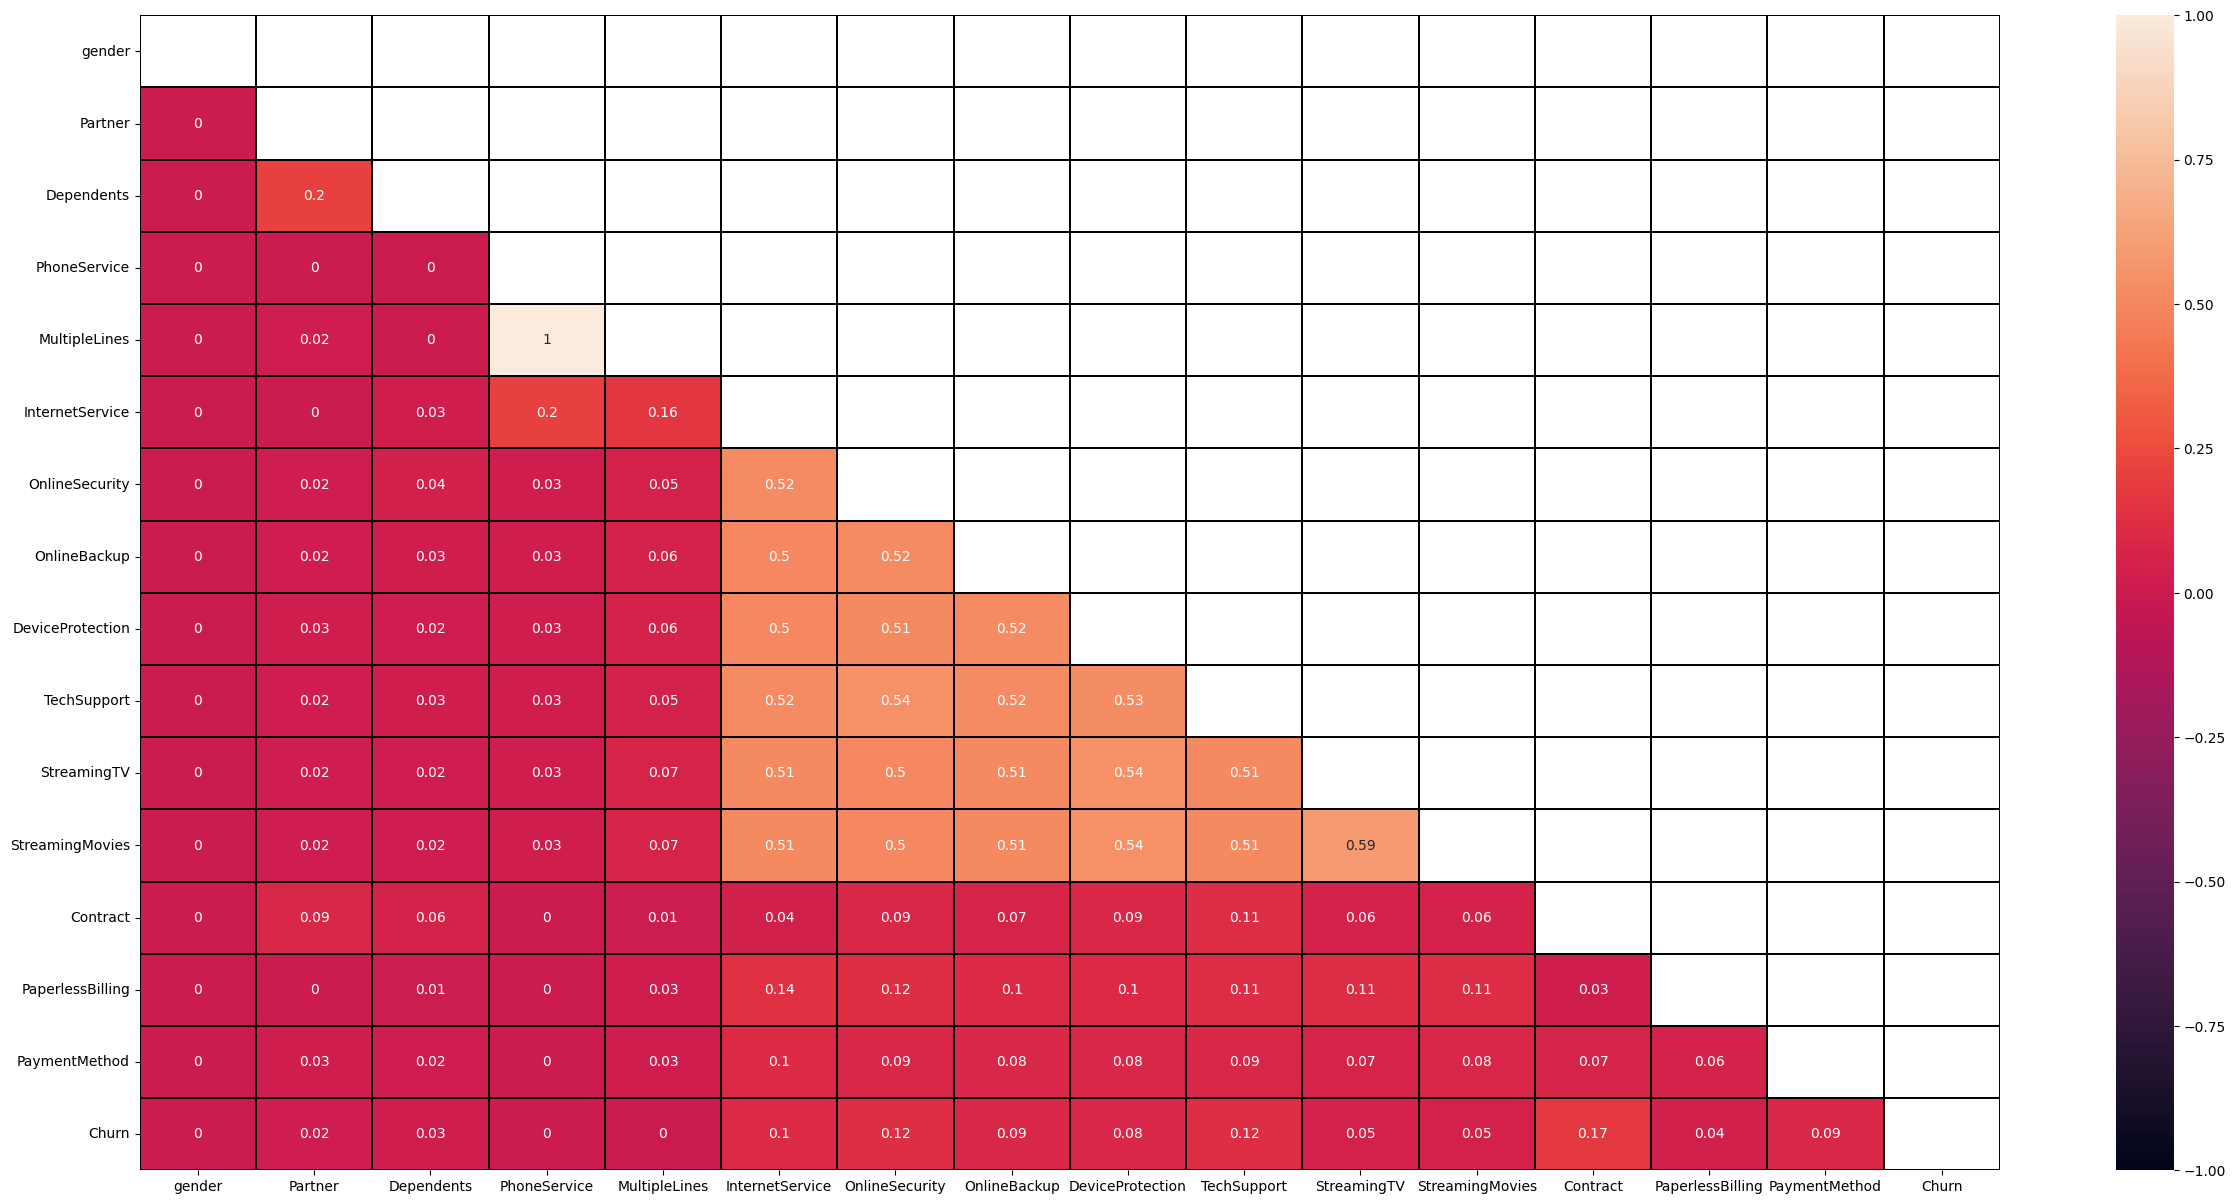

In [24]:
# visualize heatmap
triangle_mask = np.zeros_like(df_cramer_results, dtype=np.bool_)
triangle_mask[np.triu_indices_from(triangle_mask)] = True

plt.figure(figsize = (30,15))
sns.heatmap(data = df_cramer_results, linewidths=.1, linecolor='black', vmin = -1, vmax = 1, mask = triangle_mask, annot = True)

In [25]:
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

    - So what of analysis:
        - Focus on **Churn** variable:
            - Contract haves 0.17 cramer v assosiation
            - TechSupport and OnlineSecurity haves 0.12 cramer v assosiation
            - PaymentMethod haves 0.09 cramer v assosiation

# Bivariate analysis
- Countplots

In [26]:
# select categorical variables and plot categorical figures to compare the distribuition of the categories
df_count_plot = df2.select_dtypes(exclude=['int','float']).drop(['customerID'], axis=1)

In [27]:
df_count_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   Partner           7043 non-null   object
 2   Dependents        7043 non-null   object
 3   PhoneService      7043 non-null   object
 4   MultipleLines     7043 non-null   object
 5   InternetService   7043 non-null   object
 6   OnlineSecurity    7043 non-null   object
 7   OnlineBackup      7043 non-null   object
 8   DeviceProtection  7043 non-null   object
 9   TechSupport       7043 non-null   object
 10  StreamingTV       7043 non-null   object
 11  StreamingMovies   7043 non-null   object
 12  Contract          7043 non-null   object
 13  PaperlessBilling  7043 non-null   object
 14  PaymentMethod     7043 non-null   object
 15  Churn             7043 non-null   object
dtypes: object(16)
memory usage: 880.5+ KB


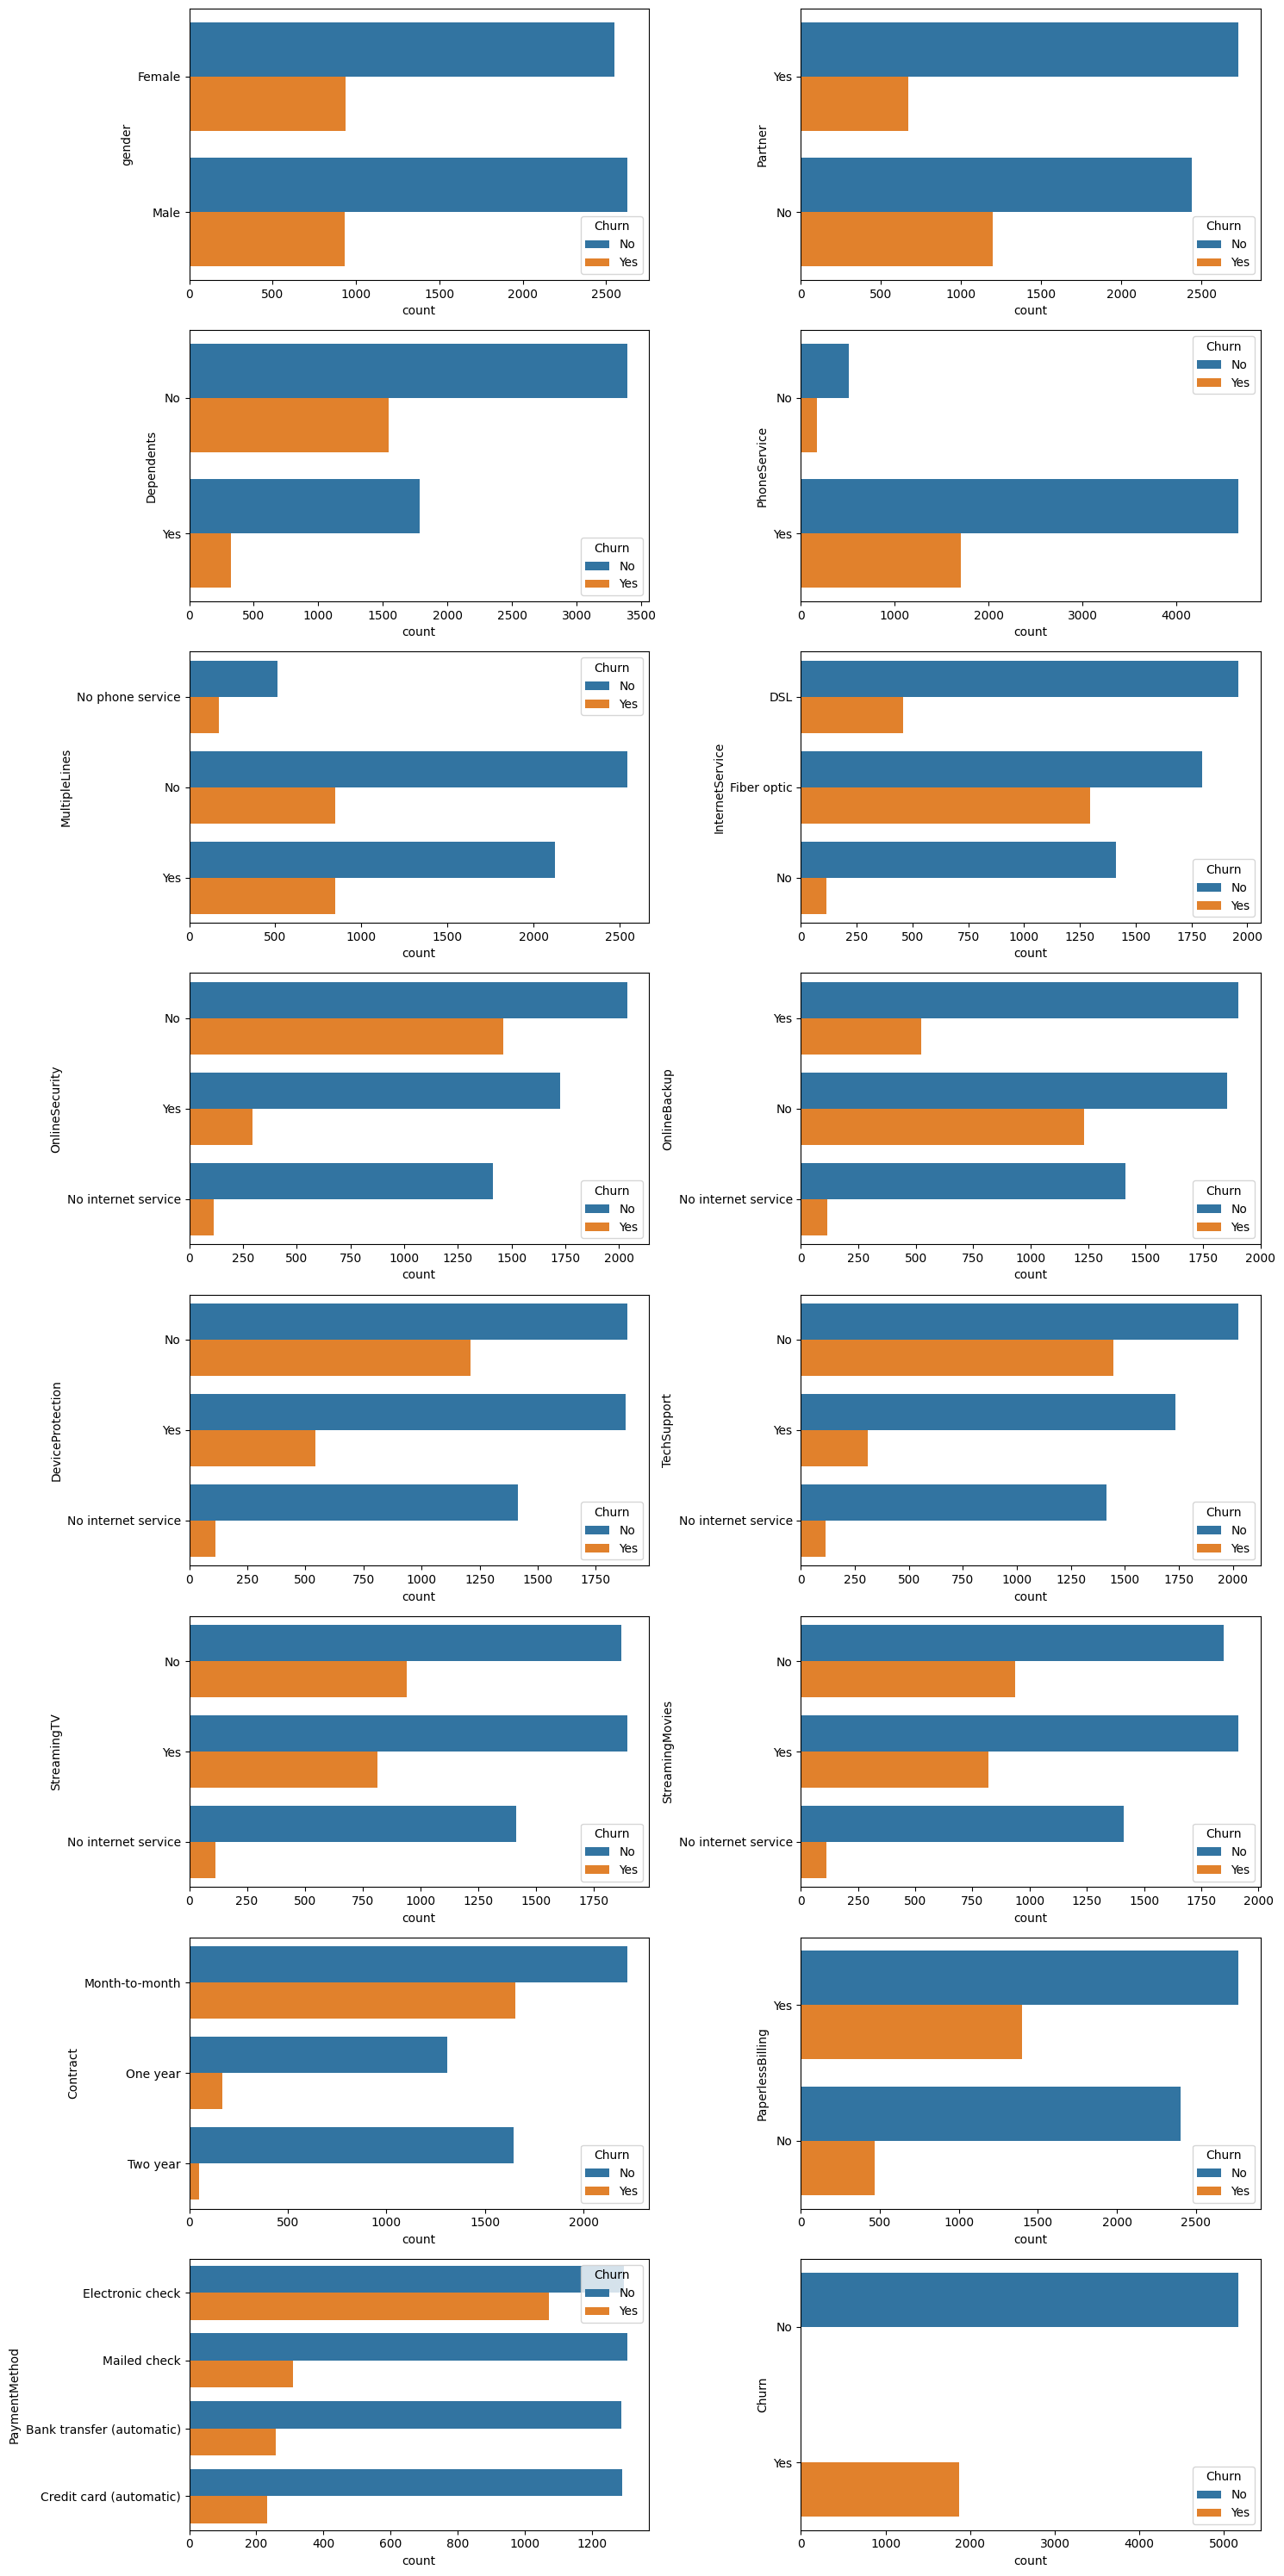

In [39]:
# visualizing Churn by categorical variables

plt.figure(figsize=(15,30))

for i in range(len(df_count_plot.columns)):

    plt.subplot(8,2,i+1)

    sns.countplot(data=df_count_plot, y= df_count_plot[df_count_plot.columns[i]], hue = "Churn" )

    plt.tight_layout()

    - So what of this categorigal variables grouped by Churn target
        - The churn from **gender** is balanced !
        - No **partner** is most frequente to Churn
        - No **Dependents** is most frequent to churn

# Univariate analysis
- displots
- histograms
- lineplots

# Business hypothesis

## Testing hypothesis